# Phase 2 Milestone 1

> Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network.


# I - Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

### Assignment Objectives

> Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.



* Nama        : Muhamad Ivan

* Batch       : FTDS-013

* Dataset     : Gender Classification (https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset)
* Objective   : Membuat Model yang dapat memprediksi kelamin seseorang dari foto.

# II - Import Libraries


> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.layers import  Dense, Input, Dropout, BatchNormalization
from keras.utils import plot_model


# III - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset

df = pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option("display.max.columns",None) # digunakan untuk menampilkan keseluruhan kolom pada dataset
pd.set_option('display.max_row', 20)


In [3]:
# Menampilkan Head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Menampilkan Tail
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Duplikasi dataset
df_copy = df.copy()

In [6]:
# Menampilkan Jumlah Column dan Row
df.shape

(7043, 21)

In [7]:
# Menampilkan jumlah Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

***Pengertian* tiap-tiap kolom**

> Content
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The data set includes information about:

    - Customers who left within the last month – the column is called Churn
    - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    - Demographic info about customers – gender, age range, and if they have partners and dependents


In [9]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

> Catatan:
Diketahui ketika pembuatan grafik EDA terdapat pengotor di kolom 'TotalCharges'. Oleh karena itu nilai pengotor tersebut dijadikan missing values. Oleh karena itu proses kembali ke atas dan meletakan perbaikan ini sebelum melihat nilai deskriptifnya

In [10]:
# Melihat gambaran  terkait dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


***Informasi* Statistik Deskriptif**

Diketahui dataset memiliki 21 kolom dan 7043 row yang membahas demografis, status pembayaran, tiap-tiap pelanggan telkominikasi. Berikut informasi yang dapat diambil dari data ini:
- Terdapat 1 column interger, 2 column float, dan 18 column object yang menandakan terdapat 3 kolom numerik dan 18 kolom kategorik/object
- Dataset ini memiliki 7043 row.
- Pada pengamatan awal Tidak ditemukan missing value pada dataset ini.
- Pembahasan mengenai data akan dibahas lebih dalam pada EDA.
- Insight yang dapat diambil:
    - Berdasarkan data statistik deskriptif ini column `tenure` menggambarkan lamanya customer tersebut menjadi pelanggan dengan satuan bulan. Rata-rata pelanggan sudah berlanggan selama 32 bulan atau mendekati 3 tahun. Sedangkan mediannya 29 bulan. Nilai mean dan median cukup dekat dimungkinkan column ini tidak memiliki outlier. Namun pengecekan mendalam akan dilakukan setelah ini.
    - Pada column `MonthlyCharges` diketahui nilai rata-rata adalah 64.7 USD/bulan sedangkan nilai mediannya 70.35 USD/bulan Nilai mean dan median cukup dekat dimungkinkan column ini tidak memiliki outlier. Namun pengecekan mendalam akan dilakukan setelah ini. Nilai maksimum pembayaran adalah 118 USD/bulan. Secara kasat mata tidak ada kejanggalan dari data yang ada.


# IV - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


## ***A. EDA* *(Pie Chart)***

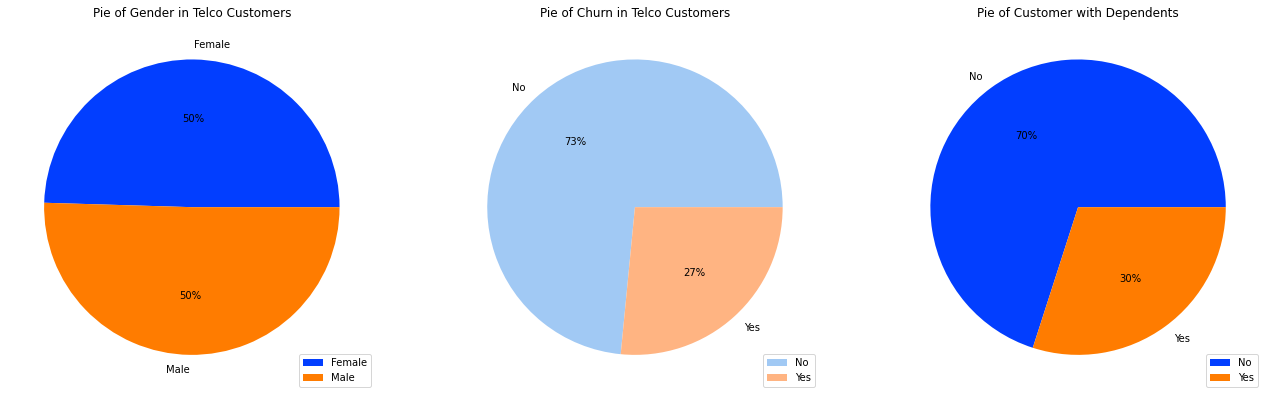

In [11]:
# Pie Chart

plt.figure(figsize=(22.5, 10.5),facecolor='white')
plt.subplot(1, 3, 1)
ax= df.groupby(by=['gender'])[['Partner']].count()
colors = sns.color_palette('bright')
plt.pie(ax['Partner'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(loc='lower right')
plt.title('Pie of Gender in Telco Customers')

plt.subplot(1, 3, 2)
ax= df.groupby(by=['Churn'])[['Partner']].count()
colors = sns.color_palette('pastel')
plt.pie(ax['Partner'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(loc='lower right')
plt.title('Pie of Churn in Telco Customers')

plt.subplot(1, 3, 3)
ax= df.groupby(by=['Dependents'])[['Partner']].count()
colors = sns.color_palette('bright')
plt.pie(ax['Partner'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(loc='lower right')
plt.title('Pie of Customer with Dependents')

plt.show()

> Insight:
1. **Pie of Gender In Telco Customers**: Pie ini memberikan informasi kepada kita mengenai persentase gender pengguna Telco. Penulis memiliki asumsi bahwa urus-mengurus intenet didominasi kaum pria. Namun berdasarkan data, kaum wanita juga merupakan target pasar yang sepadan dengan kaum pria yaitu 50% wanita dan 50% pria.
 ` `
 
2. **Pie of Churn in Telco Customers**: diketahui pengertian Churn adalah berhenti menggunakan jasa Perusahaan Telco dataset ini. Penyebabnya bisa jadi karena memang tidak butuh koneksi atau berpindah ke competitor. Berdasarkan data ini terdapat 27% pelanggan yang berhenti berlanggan dan 73 % lainnya melanjutkan layanannya di perusahaan telco ini. Penulis berpendapat Churn sebanyak 27% dapat dikategorikan sangat besar karena artinya pendapatan perusahaan turun dengan persentase yang lebih kurang sama.
3. **Pie of Customers with Dependents**: diketahui pelanggan perusahaan ini kebanyakan adalah tidak berkeluarga karena diketahui persentase yang memiliki tanggungan hanya 30%, sedangkan 70% lainnya hidup sendiri tanpa tanggungan.

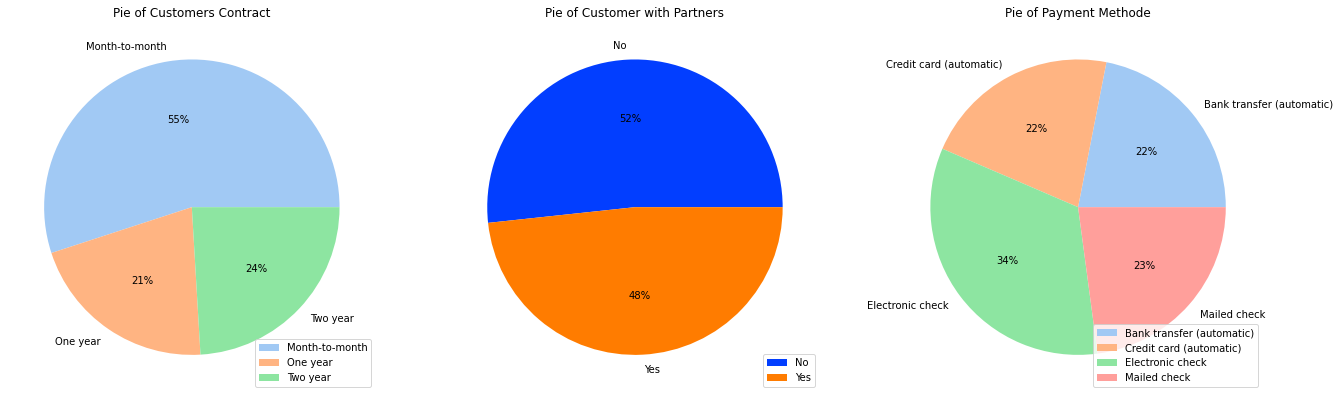

In [12]:
# Pie Chart

plt.figure(figsize=(22.5, 10.5),facecolor='white')
plt.subplot(1, 3, 1)
ax= df.groupby(by=['Contract'])[['Partner']].count()
colors = sns.color_palette('pastel')
plt.pie(ax['Partner'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(loc='lower right')
plt.title('Pie of Customers Contract')

plt.subplot(1, 3, 2)
ax= df.groupby(by=['Partner'])[['Dependents']].count()
colors = sns.color_palette('bright')
plt.pie(ax['Dependents'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(loc='lower right')
plt.title('Pie of Customer with Partners')

plt.subplot(1, 3, 3)
ax= df.groupby(by=['PaymentMethod'])[['Partner']].count()
colors = sns.color_palette('pastel')
plt.pie(ax['Partner'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(loc='lower right')
plt.title('Pie of Payment Methode')

plt.show()

> Insight:
1. **Pie of Customers Contract**: Pie ini memberikan informasi kepada kita tentang jenis -jenis kontrak kerjasama yang dibuat pelanggan dengan provider. Diketahui mayoritas pelanggan kontraknya adalah bulanan dengan 55%. Sedangkan yang membuat kontrak satu tahun sebesar 21% dan kontrak 2 tahun sebesar 24%.
 ` `
 
2. **Pie of Type Employment In Data Scientist**: diketahui mayoritas pelanggan provider telco ini tidak memiliki pasangan yaitu 52%.
3. **Pie of Company Size In Data Scientist**: diketahui mayoritas pelanggan menggunakan electronic check untuk mengetahui besarnya tagihan mereka yaitu 34%. Sedangkan untuk opsi pembayaran lainnya dengan kartu kredit, transfer bank, dan Email persentasenya hampir sama yaitu 22%.

## ***B. EDA* *(Histogram)***

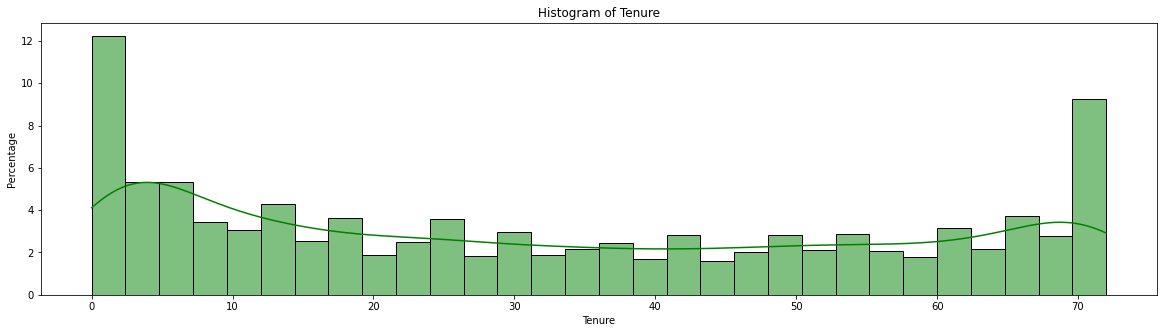

In [13]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Tenure')
sns.histplot(df['tenure'], bins=30, kde=True, color='green', element='bars',stat='percent')
plt.xlabel('Tenure')
plt.ylabel('Percentage')

plt.show()

> Insight:
1. **Histogram of Tenure**: 
- Histogram ini memberikan kita informasi bahwa distribusi lamanya menjadi pelanggan provider Telco ini cukup merata. 
- Hanya terjadi penumpukan bagi pelanggan yang baru ikut 1-4 bulan. Hal ini wajar karena banyak pelanggan yang ingin merasakan pengalaman menggunakan jasa telco dari provider ini dan jumlah persentasenya sebesar 12%. 
- Kemudian diketahui ternyata terjadi pula penumpukan pelanggan yang telah ikut mendekati 6 tahun dan jumlahnya sebesar 9%. Hal ini cukup baik yang menandakan provider ini banyak memiliki pelanggan setia.


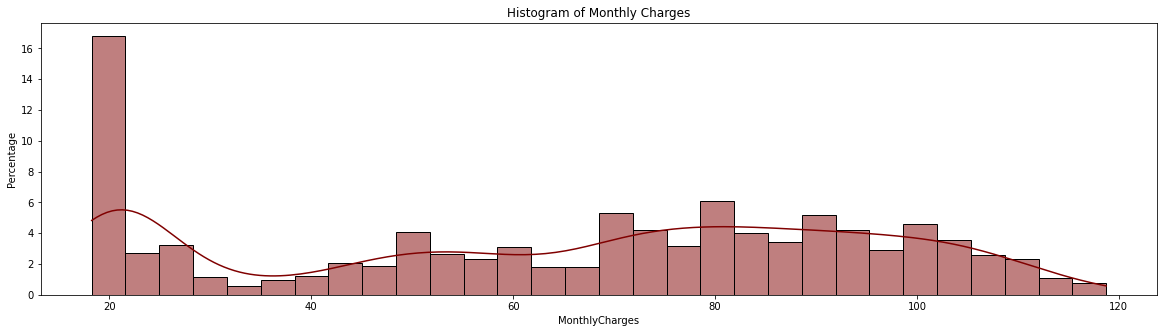

In [14]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Monthly Charges')
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='maroon', element='bars',stat='percent')
plt.xlabel('MonthlyCharges')
plt.ylabel('Percentage')

plt.show()

> Insight:
1. **Histogram of Monthly Charges**: 
- Histogram ini memberikan kita informasi bahwa distribusi besarnya biaya bulanan yang harus dibayarkan pelanggan. 
- Sebanyak 16% membayar biaya layanan telco nya sebesar 20USD-an. 
- Sedangkan pada range lainnya yaitu 20 USD-an hingga 120 USD persentasenya berkisar 1%-4%

Text(0, 0.5, 'Percentage')

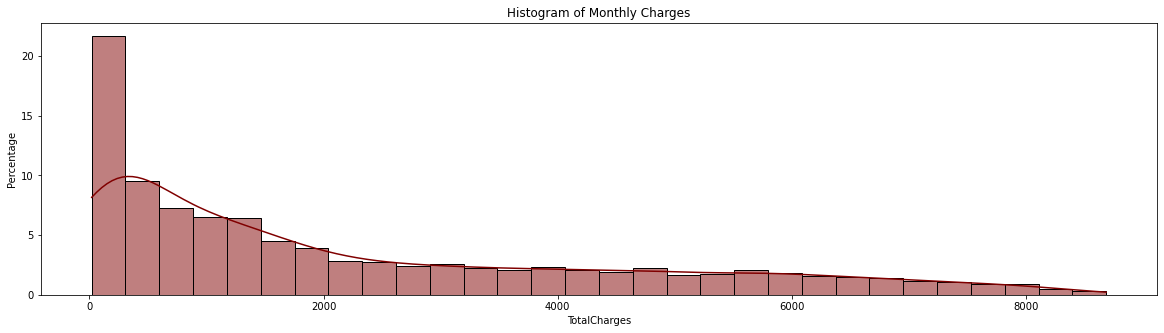

In [15]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Monthly Charges')
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='maroon', element='bars',stat='percent')
plt.xlabel('TotalCharges')
plt.ylabel('Percentage')

> Insight:
1. **Histogram of Total Charges**: 
- Histogram ini memberikan kita informasi mengenai distribusi total uang yang telah dikeluarkan oleh pelanggan untuk jasa provider Telco yang mereka gunakan
- Sebanyak 22% membayar total layanan telco selama berlanggan sebesar 0-500 USD 
- Sedangkan pada range lainnya yaitu 500 USD-an hingga 8600 USD persentasenya secara teratur menurun dari 10% hingga 1%
- Hubungan persentase pelanggan dan jumlah uang yang telah dikeluarkannya berbanding terbalik. Hal ini sesuai dengan keadaan lapangan dimana terdapat kesulitan mengubah konsumen biasa menjadi konsumen setia. Oleh karena itu jumlah konsumen setia ini persentasenya jauh lebih sedikit dibandingkan persentase konsumen baru.

## ***C. EDA* *(Scatterplot)***

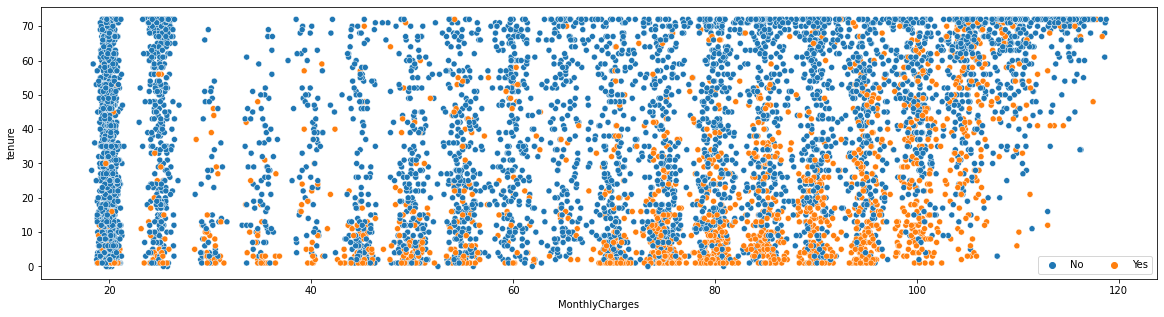

In [16]:
plt.figure(figsize=(20, 5),frameon=True)
sns.scatterplot(data=df, x="MonthlyCharges", y='tenure',hue='Churn')
plt.legend( loc ="lower right",ncol=9)

> Insight:
1. Diketahui berdasarkan grafik scatterplot trend dari dataset ini
2. Kecenderungan pelanggan yang berhenti dari layanan telco ini adalah pelanggan dengan Monthly Charges-nya berkisar 70-110 USD/bulan.
3. Kemudian diketahui pula pelanggan yang cendrung berhenti dari layanan adalah pelanggan-pelanggan yang belum sampai setahun berlangganan. Semakin lama mereka berlangganan kemungkinan berhentinya semakin kecil.

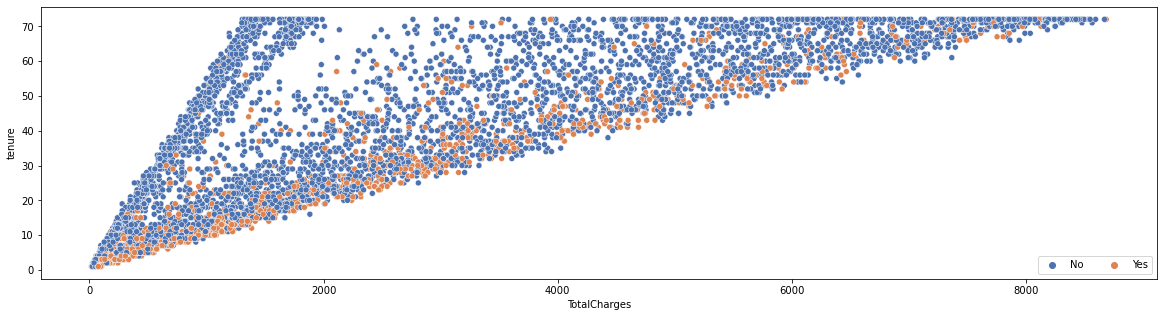

In [17]:
plt.figure(figsize=(20, 5),frameon=True)
sns.scatterplot(data=df, x="TotalCharges", y='tenure',hue='Churn',palette="deep")
plt.legend( loc ="lower right",ncol=9)

> Insight:
1. Diketahui berdasarkan grafik scatterplot trend dari dataset ini
2. Penulis memiliki hipotesis bahwa semakin tinggi Total Charges maka semakin rendah Churn. Berdasarkan pengamatan visual grafik, hipotesis penulis kemungkinan benar
3. Semakin kecil total charges dan Tenure pelanggan memiliki kecendrungan untuk berhenti berlangganan provider ini.

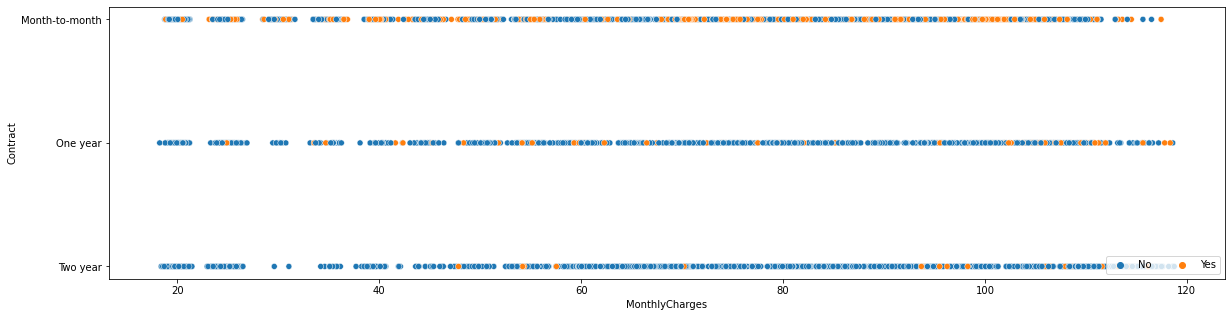

In [18]:
plt.figure(figsize=(20, 5),frameon=True)
sns.scatterplot(data=df, x="MonthlyCharges", y='Contract',hue='Churn')
plt.legend( loc ="lower right",ncol=9)

> Insight:
1. Penulis memiliki hipotesis bahwa pelanggan dengan katerori Month to Month memiliki kecendrungan untuk berhenti dibandingkan pelanggan yang membuat perjanjian kerjasama 1 tahun dan 2 tahun
2. Berdasarkan pengamatan grafik diketahui hipotesis penulis benar karena jumlah Churn mendominasi pelanggan yang membayar per bulannya tanpa kontrak.

## ***D. EDA* *(Heatmap)***

<AxesSubplot:>

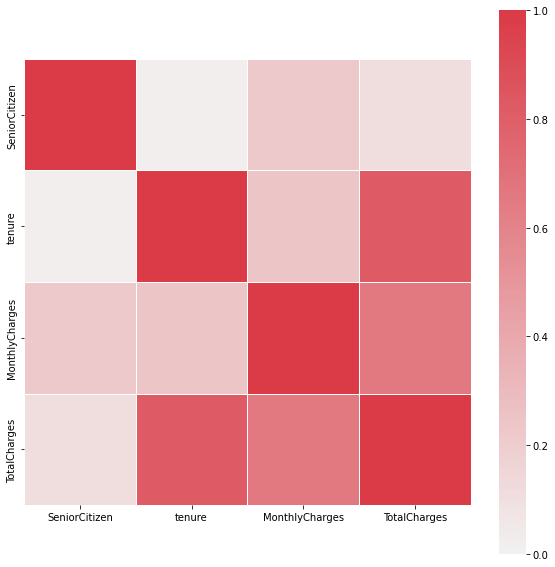

In [19]:
# Heatmap for Numerical Columns
corr = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

> Insight:
1. Berdasarkan grafik Heatmap yang terdiri dari 4 column yaitu `Senior Citizen`, `Tenure`, `MonthlyCharges`, dan `TotalCharges`
2. Berdasarkan heatmap korelasi ini diketahui terdapat hubungan yang kuat antara totalCharges dan Monthly Charges. Hal ini sangat logis karena besarnya TotalCharges adalah MonthCharges dikali Tenure, walaupun tidak semua pelanggan seperti itu karena ada pelanggan yang mengganti paketnya di tengah perjalanan ketika berlangganan.
3. Oleh karena itu 4 column ini akan digunakan untuk melakukan prediksi.

# V - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## **A. Feature Selection I**

In [20]:
# Mengubah nilai pada kolom Churn menjadi 0 dan 1 dengan ketentuan 0 = 'No' dan 1 = 'Yes'
df['Churn'] = df['Churn'].replace(['No','Yes'],[0,1])


In [21]:
# Drop Column yang korelasinya tidak signifikan

df.drop(columns=['customerID'],inplace=True)

> Alasan Drop:
- Drop Column `customerID` karena berdasarkan pertimbangan penulis. Tidak ada kaitan antara code pelanggan dengan berhenti atau tidak berhentinya suatu pelanggan.


In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


> Catatan:
1. Dilakukan drop terhadap column `customerID` karena tidak memiliki korelasi dengan turnovernya seorang pelanggan.
2. Pada column selain numerical akan digunakan semuanya. Sehingga pada prediksi kali ini akan digunakan 20 Column dengan komposisi 16 kategorikal dan 4 numeric. 
3. Dilakukan perubahan terhadap nilai Churn. Mengubah `No` menjadi 0 dan `Yes` menjadi 1

## **B. Handling Missing Values**

In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df.head()

,column_name,percent_missing
TotalCharges,TotalCharges,0.156183
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
MonthlyCharges,MonthlyCharges,0.000000
PaymentMethod,PaymentMethod,0.000000


In [24]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

> Catatan:
1. Pada kolom TotalCharges ditemukan terdapat missing values sebanyak 0.15%.
2. Missing values ini disebabkan karena terdapat pengotor yang berbentuk object pada kolom 'TotalCharges'
3. Setelah dibersihkan 'TotalCharges` yang awalnya bertipe object menjadi float.
4. Pengisian Missing Values menggunakan median karena persentase missing values kurang dari 5%

## **C. Get Data for Model Inference**

In [25]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=26)
df_inf.shape

(10, 20)

` mengambil 10 data untuk menjadi model inference atau dataset baru `

In [26]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)
df_train_test.shape

(7033, 20)

` Membuang 10 row data yang dijadikan inference dari dataset keseluruhan `

In [27]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0
1,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0
2,Female,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0
3,Male,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1
4,Male,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0
5,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.10,0
6,Male,0,Yes,No,8,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,609.90,1
7,Female,0,No,No,15,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85,0
8,Male,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,1
9,Male,0,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,0


` dilakukan reset index untuk menyamakan index akibat dari 10 row yang diambil `

## **D. *Splitting Dataset***

In [28]:
df_train_test.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


In [29]:
# Split between `X` (Features) and `y` (Target)

X = df_train_test.drop('Churn', axis=1)
y = df_train_test['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7029,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7030,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7031,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [30]:
# Split between Train-Set and Test-Set

x_train_full, x_test,  y_train_full, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, shuffle=True, test_size=0.2)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (4500, 19)
Validation data shape: (1126, 19)
Testing data shape: (1407, 19)


> Catatan:
1. Dilakukan drop terhadap column `Churn` karena tujuan dari permodelan ini adalah melakukan prediksi terhadap kemungkinan seorang konsumen berhenti berlanggan. Sehingga column `Churn` dijadikan kolom target.
2. Kemudian dilakukan split terhadap data, sehingga menjadi data Train dan data Test. Pada data Train terdapat (5.626 row dan 19 column). Kemudian pada data Test terdapat (1407 row dan 19 column).
3. Kemudian dilakukan split terhadap data Train, sehingga menjadi data Train dan data Validation. Pada data Train terdapat (4500 row dan 19 column). Kemudian pada data Test terdapat (1126 row dan 19 column).

## **E. *Handling Outlier***

In [31]:
pd.DataFrame(x_train.skew(numeric_only=True),columns=['Skewness'])

,Skewness
SeniorCitizen,1.857728
tenure,0.250453
MonthlyCharges,-0.215409
TotalCharges,0.968457


> Catatan:
1. Diketahui dari data diatas terdapat 2 column numerik yang dapat dikategorikan Skew karena memiliki gradeness of skew  <-0.5 dan >0.5 sehingga harus dilakukan scaling dengan MinMaxScaler. 
2. Penulis tidak ingin menggunakan metode Trimming dan wisorizer karena penulis berpendapat bahwa outlier ini adalah natural bukan karena kesalahan sistem ataupun kesalahan manusia. 
    - Wajar apabila pada column SeniorCitizen terdapat data outlier karena pasti penggunaan internet di dominasi oleh anak muda sehingga jumlah SeniorCitizen cukup sedikit dibandingkan anak muda.
    - Kemudian pada column TotalCharges sangat mungkin terdapat pelanggan yang internetnya istimewa sehingga harga yang ditawarkan jauh lebih mahal dibandingkan pelanggan lainnya.

## **F. *Feature Scaling & Encoding***

In [32]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6687,Female,0,No,No,30,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),79.30,2427.10
2086,Female,0,Yes,Yes,48,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),29.50,1423.05
4937,Male,0,Yes,Yes,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,24.40,253.90
125,Male,0,No,No,33,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Two year,Yes,Electronic check,88.95,3027.65
719,Male,0,Yes,Yes,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1305.95


> catatan:
1. Pada kasus ini akan digunakan `metode pipeline`, oleh karena itu proses scaling dan encoding akan dilakukan pada tahap Model Definition bersamaan dengan pendefinisian model training yang akan digunakan.

# VI - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

#### **a. Pipeline Preprocessing SKLEARN**

In [33]:
# Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan scalling
numeric_features_mc = ['SeniorCitizen','TotalCharges']
numeric_features_sc = ['tenure','MonthlyCharges']

In [34]:
# Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan Encoding
cat_features_oe = ['Contract']
cat_features_he = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                   'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

preproc_pipeline = ColumnTransformer([
        ("num1", StandardScaler(), numeric_features_sc),
        ("num2", MinMaxScaler(), numeric_features_mc),
        ("cat1", OneHotEncoder(handle_unknown='ignore'), cat_features_he),
        ("cat2",OrdinalEncoder(categories=[['Month-to-month','One year','Two year']],handle_unknown='use_encoded_value',unknown_value=np.nan ),cat_features_oe)
])                                      


In [35]:
# Transform X_train, X_test, dan X_val
X_train = preproc_pipeline.fit_transform(x_train)
X_test = preproc_pipeline.transform(x_test)
X_val = preproc_pipeline.transform(x_val)

> Keterangan:
1. Dilakukan proses Scaling dan Encoding terhadap data X_train, X_test, dan X_val
2. Pada proses caling dilakukan MinMaxScaler dan Standard Scaler. MinMax Scaler dilakukan pada kolom `SeniorCitizen` dan `TotalCharges` karena berdasarkan pengecekan gradeness skew termasuk kategori moderately skew dan highly skewed. Kemudian kolom `tenure` dan `MonthlyCharges` digunakan Standardscaler karena memiliki distribusi normal.
3. Pada proses encoding dilakukan OneHotEnoder dan ordinalEncoder. OrdinalEncoder dilakukan pada kolom `Contract` karena memiliki tingkatan dari kontrak bulanan, kontrak 1 tahun, dan kontrak 2 tahun. Sedangkan sisa kolom kategorikal tidak memiliki tingkatan sehingga dilakukan OneHotEncoder.
4. Setelah itu dibuatkan pipeline bernama *preproc_pipeline* yang memasukan proses scaling dan encoding. Dari pipeline ini digunakan untuk melakukan transform terhadap X_train, X_test, dan X_val.

#### **b. Pipeline Preprocessing TensorFlow**

In [36]:
AUTOTUNE = tf.data.AUTOTUNE
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):    
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))    
    preprocessed_data=data_ds    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch        
    else:         
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)       
    return data_batches 

In [37]:
training_batches = get_batches(X_train, y_train, x_train.shape[0], 64, shuffle=True)
validation_batches = get_batches(X_val, y_val, x_val.shape[0], 64, shuffle=False)
testing_batches = get_batches(X_test, y_test, x_test.shape[0], 64, shuffle=False)

> Keterangan:
1. Dilakukan pembuatan pipeline Tensorflow untuk melakukan shuffle dan prefetch yang berfungsi secara sedikit demi sedikit melakukan fit.
2. Dibuatkan fungsi bernama `get_batches` untuk melakukan prefetch dengan pilihan dapat melakukan shuffle dan tidak melakukan shuffle
3. Setelah itu fungsi ini digunakan kepada X_train dan y_train menjadi training_batches, X_val dan y_val menjadi validation_batches, danX_test dan y_test menjadi testing_batches.

#### **C. Creating Model**

##### **1. Creating Model Sequential API**

In [38]:
# Membuat model Sequential API
seq_model = Sequential()
seq_model.add(Dense(300, input_shape = (43, ),activation = "relu", kernel_initializer='he_normal'))
seq_model.add(Dense(150, activation = "relu", kernel_initializer='he_normal'))
seq_model.add(Dense(75, activation = "relu", kernel_initializer='he_normal'))
seq_model.add(Dense(25, activation = "relu", kernel_initializer='he_normal'))
seq_model.add(Dense(1, activation = "sigmoid"))
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               13200     
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                                 
 dense_3 (Dense)             (None, 25)                1900      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 71,601
Trainable params: 71,601
Non-trainable params: 0
_________________________________________________________________


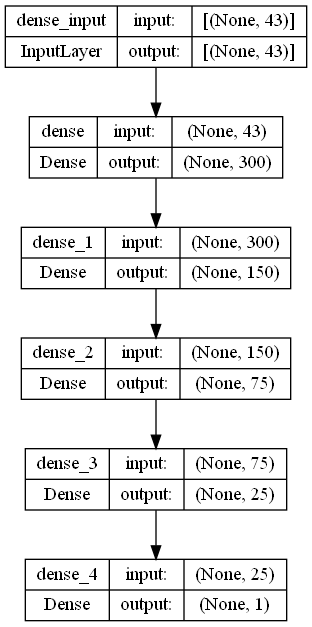

In [39]:
plot_model(seq_model, show_shapes=True)

In [40]:
keras.backend.clear_session()


> Keterangan:
1. Membuat model Sequential default dengan hidden layer sebanyak 4.
2. Neuron yang digunakan mulai dari 300, 150, 75, 25, dan output
3. Ke empat hidden layer memiliki activation "relu" dan kernel_initializer `he_normal`
4. Activation pada output adalah `sigmoid` karena pada column target berbentuk binary yaitu 0 dan 1.
5. Setelah itu dilakukan clear session.

##### **2. Creating Model Functional API**

In [41]:
# Membuat model Functional API
layer1 = Input(shape=(43, ))
layer2 = Dense(300,activation='elu')(layer1)

layer3 = Dense(200,activation='elu')(layer1)

layer4 = Dense(100,activation='elu')(layer2)

layer5 = Dense(75,activation='elu')(layer3)

layer6 = Dense(50,activation='elu')(layer4)

layer7 = Dense(25,activation='elu')(layer5)

layer8 = tf.keras.layers.concatenate([layer6,layer7])

output = Dense(1,activation='sigmoid')(layer8)
func_model = Model(inputs=layer1,outputs=output)
func_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          13200       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 200)          8800        ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 100)          30100       ['dense[0][0]']                  
                                                                                              

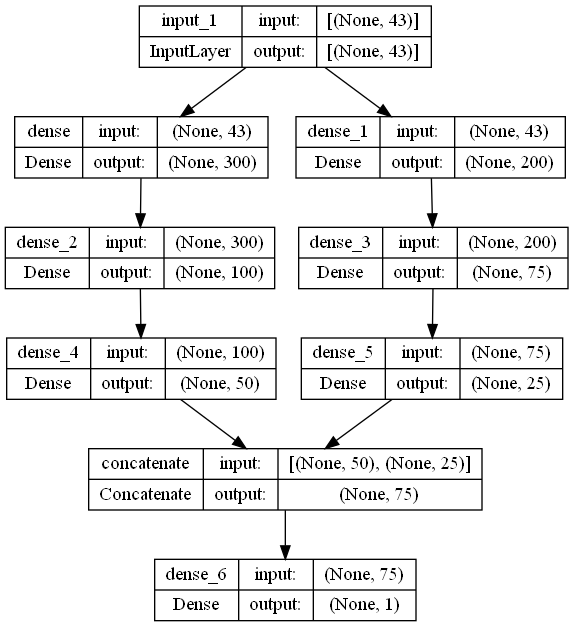

In [42]:
plot_model(func_model, show_shapes=True)

In [43]:
keras.backend.clear_session()

> Keterangan:
1. Membuat model Functional default dengan hidden layer sebanyak 3 dan 2 line. Namun terdapat pembagian line input menuju layer2(line ke-1) dan layer3(line ke-2). 
    - Dari layer2 -> layer4 -> layer6 -> layer8. 
    - Selain itu dari layer3 -> layer5 -> layer7 -> layer8. 
    - Layer8 adalah layer penggabungan antara layer6 dan layer7.
2. Neuron yang digunakan mulai dari pada line ke-1 mulai 300, 100, dan 50. Sedangkan pada line ke-2 200, 75, dan 25
3. Ke 3 hidden layer memiliki activation "elu".
4. Activation pada output adalah `sigmoid` karena pada column target berbentuk binary yaitu 0 dan 1.
5. Setelah itu dilakukan clear session.

# VII - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### **a. Model Training Sequentional API**

In [44]:
# Sequentional Compile
seq_model.compile(optimizer='adam',
                  loss=tf.keras.losses.binary_crossentropy,                   
                  metrics=['AUC'])

In [45]:
# Training model Sequentional API
history1=seq_model.fit(training_batches,
                      epochs=100, 
                      validation_data=validation_batches,verbose=0)

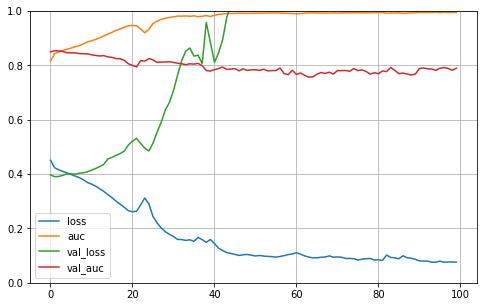

In [46]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Keterangan:
1. Pada proses compile digunakan hyperparameter antara lain:
    - Optimizer = `adam` untuk kondisi awal `adam` direkomendasikan karena berdasarkan berbagai artikel adalah fungsi yang cukup stabil.
    - loss = digunakan binary_crossentrophy karena target dari model kasus ini adalah berbentuk binary yaitu `0` dan `1`
    - metrics = digunakan AUC karena diketahui ROC-AUC adalah metrik yang cukup baik untuk data-data imbalance karena diketahui dari EDA jumlah target bernilai No(`0`) (73%) dan Yes(`1`) (27%).
2. Setelah itu dilakukan training dan evaluasi terhadap dataset training dan dataset validasi dengan jumlah epoch=100.
3. Dilakukan plot dengan matplotlib untuk melihat performa model.
4. Diketahui model Sequential ini berdasarkan visual sangat Over-fit karena nilai auc dan val_auc sangat jauh berbeda.
5. Berdasarkan visual diketahui telah terjadi vanishing gradient karena mulai dari epoch ke-20 grafik berbentuk garis lurus.

#### **b. Model Training Functional API**

In [47]:
# Functional Compile
func_model.compile(loss=keras.losses.binary_crossentropy, 
                  optimizer='adam',
                  metrics=['AUC'])

In [48]:
# Training model Sequentional API
history2=func_model.fit(training_batches,
                      epochs=100, 
                      validation_data=validation_batches,verbose=0)

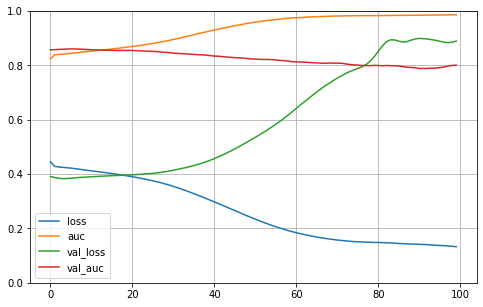

In [49]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Keterangan:
1. Pada proses compile digunakan hyperparameter antara lain:
    - Optimizer = `adam` untuk kondisi awal `adam` direkomendasikan karena berdasarkan berbagai artikel adalah fungsi yang cukup stabil.
    - loss = digunakan binary_crossentrophy karena target dari model kasus ini adalah berbentuk binary yaitu `0` dan `1`
    - metrics = digunakan AUC karena diketahui ROC-AUC adalah metrik yang cukup baik untuk data-data imbalance karena diketahui dari EDA jumlah target bernilai No(`0`) (73%) dan Yes(`1`) (27%).
2. Setelah itu dilakukan training dan evaluasi terhadap dataset training dan dataset validasi dengan jumlah epoch=100.
3. Dilakukan plot dengan matplotlib untuk melihat performa model.
4. Diketahui model Functional ini berdasarkan visual sangat Over-fit karena nilai auc dan val_auc sangat jauh berbeda.
5. Berdasarkan visual diketahui telah terjadi vanishing gradient karena mulai dari epoch ke-20 grafik berbentuk garis lurus.

#### **C. Model Improvement Sequentional API & Functional API**
> Dilakukan improvement terhadap Model Sequentional dan Functional yang telah di train pada bagian a dan b. Masalah utama yang dihadapi adalah vanishing gradient

##### **-1. Model Improvement Sequentional API**

In [50]:
# Membuat model Sequential API Improvement
seq_model_imp = Sequential([
    Dense(300, input_shape = (43, ),activation = "relu", kernel_initializer='he_normal',use_bias=False),
    BatchNormalization(),
    Dropout(rate=0.2),
    Dense(150, activation = "relu", kernel_initializer='he_normal',use_bias=False),
    BatchNormalization(),
    Dropout(rate=0.2),
    Dense(75, activation = "relu", kernel_initializer='he_normal',use_bias=False),
    BatchNormalization(),
    Dropout(rate=0.2),
    Dense(25, activation = "relu", kernel_initializer='he_normal',use_bias=False),
    BatchNormalization(),
    Dropout(rate=0.2),
    Dense(1, activation = "sigmoid")
])

seq_model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               12900     
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               45000     
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 150)               0

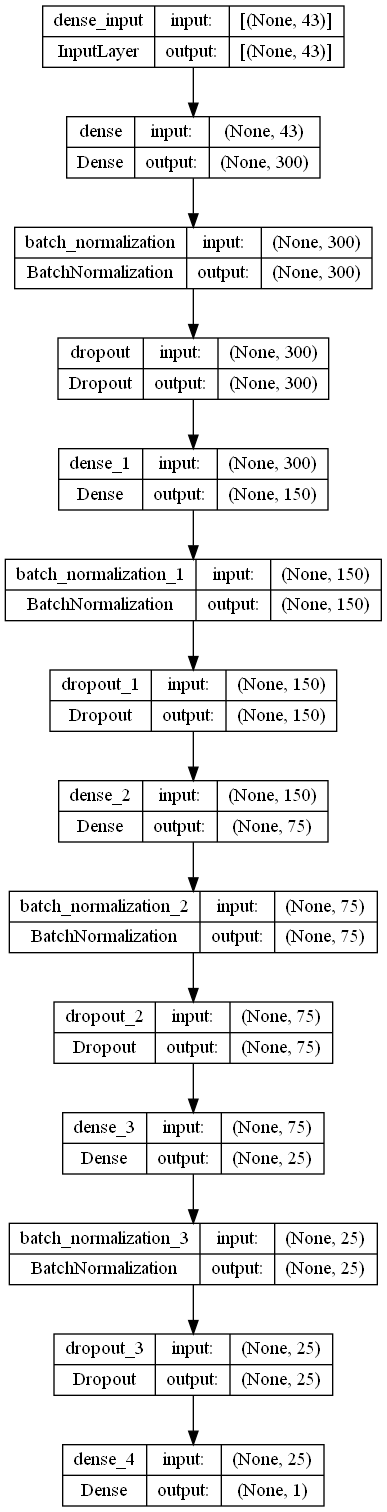

In [51]:
plot_model(seq_model_imp, show_shapes=True)

In [52]:
keras.backend.clear_session()

In [53]:
optim_sgd=tf.keras.optimizers.SGD(
            learning_rate=0.00001, 
            momentum=0.9, 
            nesterov=True, 
            name="SGD", 
            clipvalue=1,
            decay=1e-6
)

In [54]:
es = EarlyStopping(monitor='val_loss', verbose=1,patience=900,restore_best_weights=True)

In [55]:
# Sequentional Compile Improvement

seq_model_imp.compile(optimizer=optim_sgd,
                  loss=tf.keras.losses.binary_crossentropy,                   
                  metrics=['AUC']
                  )

In [56]:
# Training model Sequentional API

history1_imp=seq_model_imp.fit(training_batches,
                      epochs=1000, 
                      validation_data=validation_batches,verbose=0,
                      callbacks=[es]
                      )

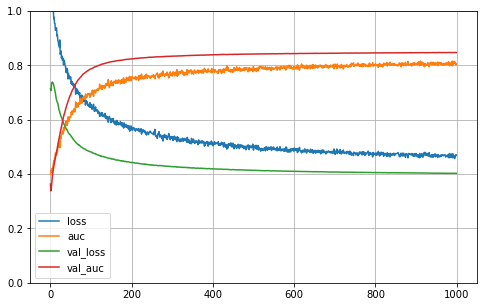

In [57]:
pd.DataFrame(history1_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Keterangan:
1. Dilakukan perbaikan terhadap Sequential model dengan menambahkan layer, optimasi terhadap optimalization, dan penambahan callbacks.
2. Arsitektur model ditambahkan batch normalization dan dropout setelah layer activation
3. Pada compiling dilakukan optimalisasi terhadap variabel `SGD`. Optimalisasi dilakukan dengan pengubahan hyperparameter menjadi:
    - learning_rate=0.00001
    - momentum=0.9 
    - nesterov=True,
    - clipvalue=1
    - decay=1e-6
4. Pada fit ditambahkan hyperparameter callbacks yang berfungsi untuk mempercepat epochs dengan mencari AUC terbaik, hyperparameter diubah menjadi:
    - patience = 900
    - monitor = val_lose
    - restore_best_weights=True
5. Hasil visual dari pelatihan model menunjukan sudah terjadi perbaikan terhadap model Sequential dari yang awalnya sangat Over-Fit dengan selisih 0.2 sekarang semakin mendekati `Good-Fit`

##### **-2. Model Improvement Functional API**

In [58]:
# Membuat model Functional API Improvement
layer1 = Input(shape=(43, ))
layer1 = Dropout(rate=0.2)(layer1)
layer2 = Dense(300,activation='elu')(layer1)
layer2 = Dropout(rate=0.2)(layer2)
layer3 = Dense(300,activation='elu')(layer1)
layer3 = Dropout(rate=0.2)(layer3)
layer4 = Dense(100,activation='elu')(layer2)
layer4 = Dropout(rate=0.2)(layer4)
layer5 = Dense(100,activation='elu')(layer3)
layer5 = Dropout(rate=0.2)(layer5)
layer6 = Dense(50,activation='elu')(layer4)
layer6 = Dropout(rate=0.2)(layer6)
layer7 = Dense(50,activation='elu')(layer5)
layer7 = Dropout(rate=0.2)(layer7)
layer8 = tf.keras.layers.concatenate([layer6,layer7])

output = Dense(1,activation='sigmoid')(layer8)
func_model_imp = Model(inputs=layer1,outputs=output)

func_model_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          13200       ['input_2[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 300)          13200       ['input_2[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 300)          0           ['dense[1][0]']                  
                                                                                              

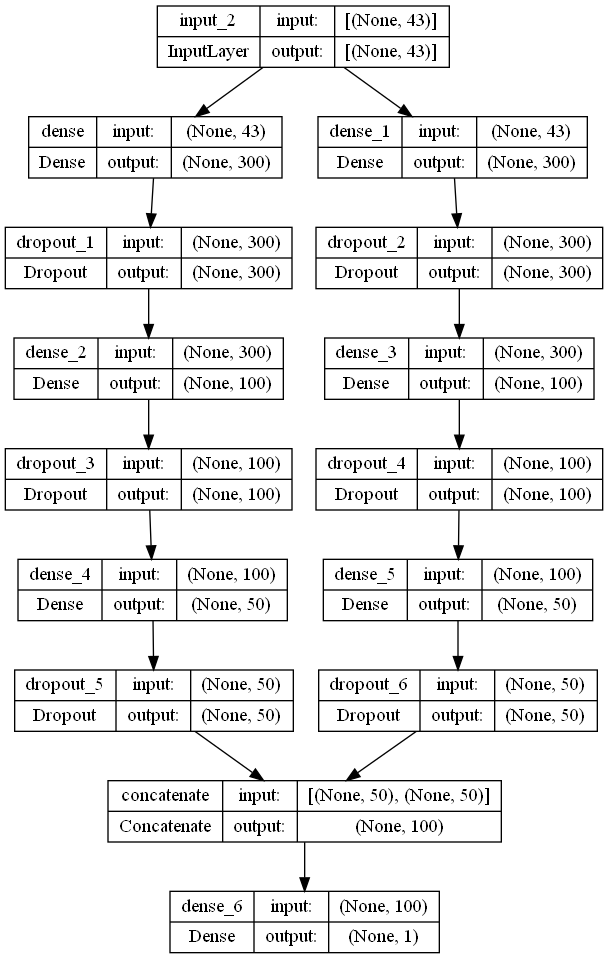

In [59]:
plot_model(func_model_imp, show_shapes=True)

In [60]:
keras.backend.clear_session()

In [61]:
optim_adam = tf.keras.optimizers.Adam(
    learning_rate=0.0000001,
    amsgrad= False,
    epsilon=1e-07,
    name="RMSprop"
)

In [62]:
func_model_imp.compile(optimizer=optim_adam,
                  loss=tf.keras.losses.binary_crossentropy,                   
                  metrics='AUC',
                  )

In [63]:
history2_imp=func_model_imp.fit(training_batches,
                      epochs=2000, 
                      validation_data=validation_batches,verbose=0,
                      callbacks=[es]
                      )

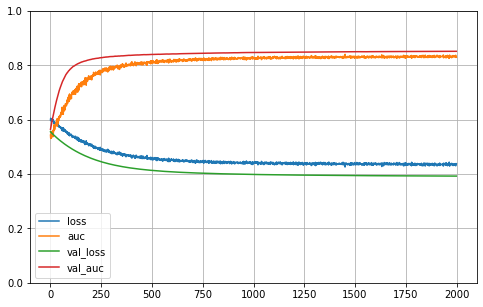

In [64]:
pd.DataFrame(history2_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> Keterangan:
1. Dilakukan perbaikan terhadap model Functional API dengan menambahkan layer, menambahkan neuron, optimasi terhadap optimalization, dan penambahan callbacks.
2. Arsitektur model ditambahkan neuron pada line ke-2 yang awalnya :
    - layer3(200 neuron) -> layer5(75 neuron) -> layer7 (25 neuron).
    - menjadi layer3(300 neuron) -> layer5(100 neuron) -> layer7(50 neuron).
3. Arsitektur model ditambahkan dropout setelah layer activation.
4. Pada compiling dilakukan optimalisasi terhadap variabel `adam`. Optimalisasi dilakukan dengan pengubahan hyperparameter menjadi:
    - learning_rate=0.0000001,
    - amsgrad= False,
    - epsilon=1e-07,
5. Pada fit ditambahkan hyperparameter callbacks yang berfungsi untuk mempercepat epochs dengan mencari AUC terbaik, hyperparameter diubah menjadi:
    - patience = 900
    - monitor = val_lose
    - restore_best_weights=True
6. Hasil visual dari pelatihan model menunjukan sudah terjadi perbaikan terhadap model Functional dari yang awalnya sangat Over-Fit dapat menjadi Good-Fit


# VIII - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### **A. Model Evaluation Before Improvement**

##### **-1. Sequential API Before Improvement**

In [65]:
eval_test_seq_1=seq_model.evaluate(testing_batches)
eval_train_seq_1=seq_model.evaluate(training_batches)
print(f'Nilai ROC-AUC Model Sequential Model testing sebelum Improvement = {round((eval_test_seq_1[1]),2)} ')
print(f'Nilai ROC-AUC Model Sequential Model training sebelum Improvement = {round((eval_train_seq_1[1]),2)} ')

71/71 [==============================] - 0s 960us/step - loss: 0.0795 - auc: 0.9953
Nilai ROC-AUC Model Sequential Model testing sebelum Improvement = 0.75 
Nilai ROC-AUC Model Sequential Model training sebelum Improvement = 1.0 


> Keterangan:
1. Nilai ROC-AUC dari Sequential Model sebelum improvement yaitu AUC Training: 99% dan AUC Testing: 72%.
2. Besarnya selisih AUC Training dan testing sebesar 27% dan bernilai Over-Fit.


##### **-2. Functional API Before Improvement**

In [66]:
eval_test_func_1=func_model.evaluate(testing_batches)
eval_train_func_1=func_model.evaluate(training_batches)
print(f'Nilai ROC-AUC Model Functional Model Testing sebelum Improvement = {round((eval_test_func_1[1]),2)} ')
print(f'Nilai ROC-AUC Model Functional Model Training sebelum Improvement = {round((eval_train_func_1[1]),2)} ')

71/71 [==============================] - 0s 1ms/step - loss: 0.1449 - auc: 0.9856
Nilai ROC-AUC Model Functional Model Testing sebelum Improvement = 0.77 
Nilai ROC-AUC Model Functional Model Training sebelum Improvement = 0.99 


> Keterangan:
1. Nilai ROC-AUC dari Functional Model sebelum improvement yaitu AUC Training: 98% dan AUC Testing: 74%.
2. Besarnya selisih AUC Training dan testing sebesar 24% dan bernilai Over-Fit.

#### **B. Model Evaluation After Improvement**

##### **-1. Sequential API After Improvement**

In [67]:
eval_test_seq_2=seq_model_imp.evaluate(testing_batches)
eval_train_seq_2=seq_model_imp.evaluate(training_batches)
print(f'Nilai ROC-AUC Model Sequential Model Testing sesudah Improvement = {round((eval_test_seq_2[1]),2)} ')
print(f'Nilai ROC-AUC Model Sequential Model Training sesudah Improvement = {round((eval_train_seq_2[1]),2)} ')

71/71 [==============================] - 0s 1ms/step - loss: 0.4188 - auc: 0.8502
Nilai ROC-AUC Model Sequential Model Testing sesudah Improvement = 0.83 
Nilai ROC-AUC Model Sequential Model Training sesudah Improvement = 0.85 


> Keterangan:
1. Nilai ROC-AUC dari Sequential Model setelah improvement yaitu AUC Training: 85% dan AUC Testing: 85%.
2. Besarnya selisih AUC Training dan testing sebesar 0%.
3. Berdasarkan subjektifitas penulis, model ini adalah `Good-Fit`

##### **-2. Functional API After Improvement**

In [68]:
eval_test_func_2=func_model_imp.evaluate(testing_batches)
eval_train_func_2=func_model_imp.evaluate(training_batches)
print(f'Nilai ROC-AUC Model Functional Model Testing sesudah Improvement = {round((eval_test_func_2[1]),2)} ')
print(f'Nilai ROC-AUC Model Functional Model Training sesudah Improvement = {round((eval_train_func_2[1]),2)} ')

71/71 [==============================] - 0s 2ms/step - loss: 0.4217 - auc: 0.8444
Nilai ROC-AUC Model Functional Model Testing sesudah Improvement = 0.84 
Nilai ROC-AUC Model Functional Model Training sesudah Improvement = 0.84 


> Keterangan:
1. Nilai ROC-AUC dari Functional Model setelah improvement yaitu AUC Training: 86% dan AUC Testing: 84%.
2. Besarnya selisih AUC Training dan testing sebesar 2%.
3. Berdasarkan subjektifitas penulis, model ini adalah `Good-Fit`.

##### **-3. Pemilihan Model Terbaik**
> Keterangan:
1. Model terbaik dipilih berdasarkan selisih terkecil AUC antara nilai data testing dan data training.
2. Kemudian jika terdapat selisih yang sama diambil nilai AUC tertinggi.
3. Berdasarkan kriteria tersebut diambil Sequential After Improvement dengan AUC Train 85% dan AUC test 85%.
4. `seq_model_imp` bernilai `Good-Fit`
4. Model terpilih akan digunakan untuk melakukan prediksi data inference.

# X - Model Saving

In [69]:
seq_model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               12900     
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               45000     
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 150)               0

In [70]:
# Freeze Model
seq_model_imp.trainable=False

In [71]:
seq_model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               12900     
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               45000     
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 150)               0

In [72]:
seq_model_imp.save("churn_model")

INFO:tensorflow:Assets written to: churn_model\assets


In [73]:
import pickle

pickle.dump(preproc_pipeline, open("preprocess_churn.pkl", "wb"))

> Keterangan:
1. Melakukan Freeze agar model tidak dapat dipelajari guna deployment model. 
2. Dilakukan save terhadap `churn_model` untuk digunakan di backend pada saat deployment
3. Kemudian dilakukan save terhadap pipeline preprocess untuk nantinya digunakan untuk mentranform dataset baru pada proses frontend. Pipeline ini dimanai `preprocess_churn.pkl`

# XI - Model Inference

In [74]:
# Display Inference-Set
df_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0
1,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0
2,Female,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0
3,Male,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1
4,Male,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0


In [75]:
# Feature Scaling dan Encoding using Pipeline
data_inf_final=preproc_pipeline.transform(df_inf)

In [76]:
# Predict using Funtional IPA After Improvement
y_pred_inf = seq_model_imp.predict(data_inf_final)
y_pred_inf

1/1 [==============================] - 0s 107ms/step


array([[0.06720305],
       [0.26353058],
       [0.28648686],
       [0.30457917],
       [0.46848038],
       [0.06827777],
       [0.62778133],
       [0.23056035],
       [0.27365226],
       [0.03183711]], dtype=float32)

In [77]:
# Predict using Funtional IPA After Improvement with the Classification
y_pred_inf_2 = np.argmax(seq_model_imp.predict(data_inf_final), axis=-1)
y_pred_inf_2

1/1 [==============================] - 0s 14ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [78]:
# Create DataFrame of Churn's Prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf_2, columns=['Churn - Prediction'])
y_pred_inf_df

,Churn - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [79]:
# Concate between Inference-Set and Churn's Prediction
pd.concat([df_inf, y_pred_inf_df], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - Prediction
0,Male,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,176.30,0,0
1,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,0,0
2,Female,0,No,No,16,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,0,0
3,Male,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,3204.65,1,0
4,Male,1,Yes,No,41,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.55,3851.45,0,0
5,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.10,0,0
6,Male,0,Yes,No,8,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,609.90,1,0
7,Female,0,No,No,15,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85,0,0
8,Male,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,1,0
9,Male,0,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,0,0


> Keterangan:
1. Dilakukan percobaan model terpilih terhadap data baru atau data inference.
2. Dilakukan transform `preproc_pipeline` terhadap data_inf menjadi data_inf_final.
3. Kemudian dilakukan predict menggunakan `seq_model_imp` yaitu model sequential API terpilih.
4. Hasil prediksi yang berbentuk probabilitas diubah menjadi klasifikasi.
5. Hasil prediksi dijadikan dataframe dengan column bernama Churn Prediction. Kemudian digabungkan dangan tabel inferensi df.

# XII - Kesimpulan

### I. Narasi based on Model Analysis
> Terdapat penjelasan macam-macam hasil metric evaluasi dan interpretasinya terhadap kasus yang diselesaikan.
1. Model Analysis - Metrik Evaluasi:
- Pemilihan model didasari pada metrik ROC-AUC karena diketahui data target cukup imbalance yaitu Yes(27%) dan No(73%).
- Secara garis besar model sequential dan functional sebelum improvement adalah Over-Fit dan model Sequential dan Functional setelah improvement adalah Good-Fit.
- Pemilihan model didasari pada selisih ROC-AUC antara train dan test yang paling kecil. Oleh karena itu terpilih model Sequential API setelah improvement.
- Improvement pada Sequential API adalah penambahan BatchNormalization, penambahan dropout, optimalisasi pada optimalizer SDG, dan penambahan callbacks.
- Kemudian berdasarkan uji Data Train (85%) dan Data Test (85%) pada Sequential API setelah improvement ditemukan selisih mendekati `0%` dengan kata lain Model ini adalah **`GOOD-FIT`**.
2. Model Analysis - Interpretasi Kasus:
- Model ini digunakan untuk memprediksi kemungkinan seorang pelanggan provider internet akan menghentikan langganannya.
- Pelanggan dapat berhenti pelanggan disebabkan beberapa hal diantaranya:
    - Sudah tidak membutuhkan jasa telco. Jika seorang pelanggan berhenti berlangganan karena alasan ini, tentu tidak terlalu bermasalah karena memang ada suatu pengeluaran yang dia secara penuh tidak membutuhkannya. Pihak provider tidak dapat menahan pelanggan seperti ini. Tentu berhenti berlangganan internet bisa disebabkan karena berpindah rumah ataupun memang mereka memilih untuk berhenti saja. 
    - Berpindah ke kompetitor. Jika seorang pelanggan berhenti berlangganan karena alasan ini, pihak provider harus mengangap ini permasalahan serius. Berkurangnya pelanggan menandakan berkurangnya cashflow. Tentu pelanggan-pelanggan seperti ini harus dapat dideteksi sebelum mereka benar-benar ingin berhenti. Segala tindakan preventif harus dilakukan.
- Dengan model yang telah dibuat kita dapat memperediksi pelanggan mana saja yang ada peluang berhenti. Dari data tersebut kita bisa urutkan dari persentase peluang berhenti tertinggi. Data ini kemudian diberikan kepada pihak marketing atau customer retention team atau team sejenis.
- Pihak marketing atau customer retention harus melakukan usaha preventif diantaranya menanyakan keluhan kepada orang-perorangan tersebut, memberi promo kepada customer-customer tersebut, ataupun yang paling berpengaruh adalah menyuruh mereka berpindah paket `Contract` menjadi lebih tinggi dari yang awalnya bulan per bulan menjadi satu tahun dengan diberikan promo jika mau berpindah.
- Model ini diharapkan dapat membantu pihak marketing mencegah customer pindah ke competitor. Selain itu memahami penawaran yang diberikan kompetitor juga sangatlah penting agar provider telco kita tidak tertinggal trend terbaru.

### II. Narasi Based on Model Evaluation
> Dapat menjelaskan kelemahan/kekurangan dan kelebihan dari model yang dibuat.
- Digunakan Model Functional API Artificial Neural Network(Optimizer: `adam`, activation=`elu`):
- Kelebihan: 
    - Informasi disimpan di keseluruhan jaringan. Hilangnya informasi di beberapa bagian tidak mencegah jaringan untuk berfungsi.
    - Dapat bekerja walaupun dengan informasi tidak lengkap. Hilangnya informasi ini akan berdampak pada loss yang akan diterima dan bergantung pula pada seberapa pentingnya informasi hilang.
    - ANN toleran terhadap kesalahan.
    - Masalah jaringan tidak menimbulkan kerusakan tiba-tiba.
    - ANN memiliki kekuatan numerik yang dapat melakukan lebih dari satu pekerjaan pada waktu yang sama.
- Kekurangan: 
    - ANN sangat bergantung pada hardware yaitu besarnya processor yang harus sesuai dengan arsitektur yang dibuat.
    - Ketika ANN menghasilkan solusi, ANN tidak memberikan petunjuk mengapa dan bagaimana. Kesulitas memberi penjelasan ini menyebabkan kurangnya kepercayaan pada jaringan.
    - Tidak ada aturan khusus untuk menentukan struktur arsitektur jaringan. Struktur jaringan terbaik didapatkan dengan cara coba-coba.
    - ANN bekerja dengan kolom numerical. Keterampilan menerjemahkan informasi ke dalam angka berpengaruh langsung terhadap performansi jaringan. Oleh karena itu keterampilan seorang data scientist juga mempengaruhi.
    - Tanpa Callbacks ANN tidak akan memberi kita nilai terbaik. Hanya nilai terakhir yang akan tertulis.
- source: https://www.linkedin.com/pulse/artificial-neural-networks-advantages-disadvantages-maad-m-mijwel/

### III. Further Improvement
> Dapat memberikan statement untuk improvement selanjutnya dari model yang dibuat. 
- Sequentional API ANN yang telah dibuat penulis sudah cukup baik dengan status Good-Fit dengan AUC sebesar 85%. Namun penulis merasa model ini bisa lebih di improve lagi dengan cara melakukan optimalisasi terhadap kernel_initializer. Pada improvement kasus ini, penulis tidak melakukan optimalisasi terhadap initializer. Penambahan jumlah hidden layer juga dapat meningkatkan AUC yang dibuat oleh model.


### IV. Narasi based on EDA. 
> Sebutkan insight yang dapat diambil setelah proses EDA, dll.
- EDA Pie:
    - Diketahui dari dataset distribusi pengguna layanan telco provider ini sama antara laki-laki dan perempuan
    - Selanjutnya dari segi pelung berhenti berlangganan `Churn` 27% akan berhenti berlangganan dan 73% akan melanjutkan langganan
    - Diketahui mayoritas pelanggan membayar tagihan telco nya dengan electronic checks.
    - Diketahui mayoritas pengguna merupakan pengguna tanpa tanggungan atay dengan kata lain mereka membayar internet untuk dirinya sendiri yaitu 70%.
    - kemudian berdasarkan kontrak kerjasama mayoritas pelanggan merupakan pelanggan customer months- to months dengan 55%.
    
    ` `
- EDA Histogram:
    - Pada histogram Tenure diketahui pelanggan menumpuk pada pelanggan baru dengan 12% dan pelanggan yang telah berlangganan mendekati 6 tahun sebanyak 9%.
    - Pada histogram Monthlycharges diketahui 16% pelanggan membayar biaya telco sebesar 20 USD-an/bulan.
    - Pada histogram TotalCharges persentase pelanggan dan jumlah uang yang telah dikeluarkannya berbanding terbalik. Semakin besar jumlah uang yang dikeluarkan semakin kecil pelanggan pada range tersebut.
` `
- EDA Scatterplot:
    - Didapatkan informasi semakin lama mereka berlangganan (Tenure) kemungkinan berhentinya(Churn) semakin kecil.
    - Jumlah Churn mendominasi pelanggan yang membayar per bulannya tanpa kontrak. Jumlah churn menurun drastis bagi pelanggan yang melaksanakan kontrak 1 tahunan dan 2 tahunan


In [1]:
a=15.7888
round(a,2)

15.79